In [2]:
import pandas as pd 

In [28]:
pd.options.mode.chained_assignment = None

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt

### Merging 12 months of sales data into a single file 


In [5]:
#We first read all the csv file into a list ex : files
files = [file for file in os.listdir('./Sales')]
#then we create a new Data frame
all_sales = pd.DataFrame()
#Now we loop through the list i.e. files 
for file in files:
    #we load each file per iteration into df
    df = pd.read_csv("./Sales/"+file)
    #Now we keep on concatenating until the loop ends 
    all_sales = pd.concat([all_sales,df])
#Now we have a new dataframe having all the csv files in one dataframe

In [6]:
#We can also convert a dataframe into a csv file as 
all_sales.to_csv("all_sales.csv", index = False) # We don't want an index in our csv file so we put False on it 

#### Read in updated Frame 

In [7]:
all_sales = pd.read_csv("all_sales.csv")

## Clean Up the Data!

#### How to get rows that contains NaN value

In [8]:
nan_df = all_sales[all_sales.isna().any(axis = 1)]


#### Remove NaN values Rows

In [9]:
#Here we dropped (removed) all the rows that contain NaN values 
all_sales = all_sales.dropna(how = 'all')# any :  means even if one value in NaN in a row while 
#all :  mean if all value is NaN

In [50]:
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,2,3,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1,1700.00,1700.00,"New York City,NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1,600.00,600.00,"New York City,NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1,11.95,11.95,"New York City,NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1,149.99,149.99,"San Francisco,CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1,11.95,11.95,"Atlanta,GA",12,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,1,2.99,2.99,"Boston,MA",19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,1,149.99,149.99,"New York City,NY",19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,1,11.95,11.95,"San Francisco,CA",18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,1,11.95,11.95,"San Francisco,CA",18,35


#### finding 'Or' in Order Date column and delete

In [11]:
#temp_df = all_sales[all_sales['Order Date'].str[0:2] == 'Or']
# here we found the reason 
#Now we want all the rows except for these rows that contains dublicate 
#So we can simply do != and eleminate temp_df from original df
all_sales = all_sales[all_sales['Order Date'].str[0:2] != 'Or']

In [12]:
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Covert column with proper data type

In [29]:
all_sales.loc[:,'Quantity Ordered'] = pd.to_numeric(all_sales.loc[:,'Quantity Ordered'])#make int
all_sales.loc[:,'Price Each'] = pd.to_numeric(all_sales.loc[:,'Price Each'])#make float

In [30]:
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,2,3,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1,1700.00,1700.00,"New York City,NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1,600.00,600.00,"New York City,NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1,11.95,11.95,"New York City,NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1,149.99,149.99,"San Francisco,CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1,11.95,11.95,"Atlanta,GA"
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,1,2.99,2.99,"Boston,MA"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,1,149.99,149.99,"New York City,NY"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,1,11.95,11.95,"San Francisco,CA"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,1,11.95,11.95,"San Francisco,CA"


## Add necessary columns

#### Add a Month column

In [31]:
#first we start by adding an new column as Month with integer value 
#we can fetch out string from any column using below method 
all_sales['Month'] = all_sales['Order Date'].str[0:2]
all_sales['Month'] = all_sales['Month'].astype('int32')

#### Add a Sales column

In [32]:
all_sales['Sales'] = all_sales['Quantity Ordered'] * all_sales['Price Each']

#### Add City column

In [33]:
#we can do this using .appy()  :
#all_sales['City'] = all_sales['Purchase Address'].apply(lambda x : x.split(',')[1]) we can also do another way
def get_city(address):
    return address.split(',')[1]
#Since there can be cities with same name sometime so we need to include state too
def get_state(address):
    #we split two time, second split is to remove to zip code
    return address.split(',')[2].split(" ")[1]
all_sales['City'] = all_sales['Purchase Address'].apply(lambda x : get_city(x) + "," + get_state(x))

## Questions 

### 1) What was the best month for sales? How much was earned this month?

In [34]:
result = all_sales.groupby('Month').sum()

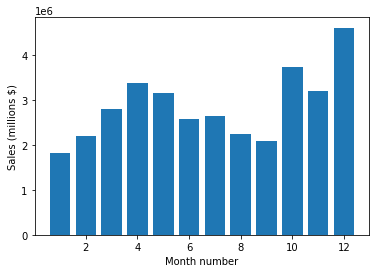

In [35]:
months = range(1,13)# We use this because we did not use reset_index()
plt.bar(months,result['Sales'])
plt.ylabel("Sales (millions $)")
plt.xlabel("Month number")
plt.show()


### 2) Which city had the highest number of Sales?

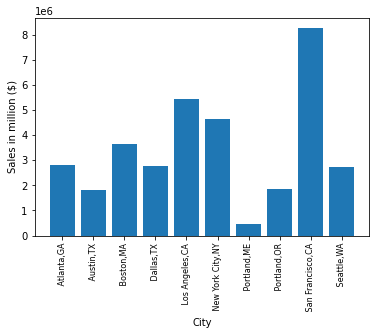

In [36]:
citySales = all_sales.groupby('City').sum()[['Sales']].reset_index()
plt.bar(citySales['City'],citySales['Sales'])
plt.xticks(rotation = 'vertical',size = 8)
plt.xlabel("City")
plt.ylabel("Sales in million ($)")
plt.show()

### 3) What time should we display advertisements to maximize likelihood of customer's buying product?

In [44]:
all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])

In [46]:
all_sales['Hour'] = all_sales['Order Date'].dt.hour
all_sales['Minute'] = all_sales['Order Date'].dt.minute

In [48]:
maxSales = all_sales.groupby('Hour').count().reset_index()

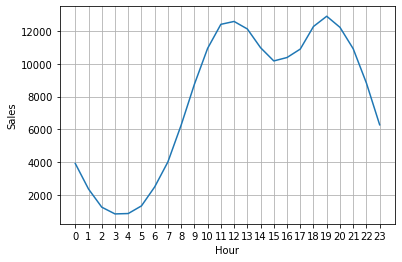

In [49]:
plt.plot(maxSales['Hour'],maxSales['Sales'])
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.xticks(maxSales['Hour'])
plt.show()

### 4) What Products are most often sold together

In [60]:
df = all_sales[all_sales['Order ID'].duplicated(keep = False)]
df['Grouped'] =df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df = df[['Order ID','Grouped']].drop_duplicates()


In [64]:
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [69]:
from itertools import combinations
from collections import Counter 

count = Counter()
for row in df['Grouped']:
    row_list = row.split(",")
    #item mostly solved together , here it shows 2 items sold together
    count.update(Counter(combinations(row_list,2)))

#most_common is method from collections 
for key,value in count.most_common(10):
    print(key,value)
    
#Our analysis shows that iphone and lightening charging cable are sold together the most.

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most ? why do you think it sold the most ?

In [70]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,2,3,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1,1700.00,1700.00,"New York City,NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1,600.00,600.00,"New York City,NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1,11.95,11.95,"New York City,NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1,149.99,149.99,"San Francisco,CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1,11.95,11.95,"Atlanta,GA",12,38


In [93]:
soldMost = all_sales.groupby('Product').sum().reset_index()

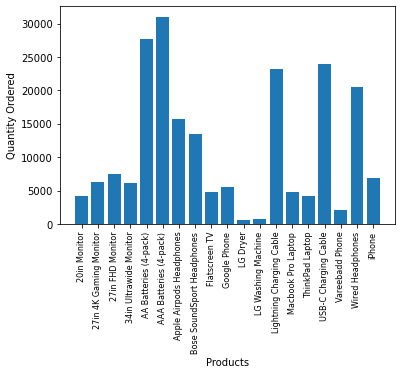

In [94]:
plt.bar(soldMost['Product'],soldMost['Quantity Ordered'])
plt.xticks(rotation = 'vertical',size = 8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()
#Here we can clearly see that AAA Batteries is sold most
#It might have sold most because these items are cheap and mostly used items

we can also overlay the bar chart with prices so as to give a clear picture

/var/folders/2z/rf048pq10ds294ss8jcnxmxc0000gn/T/ipykernel_30687/2039678650.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(soldMost['Product'],rotation = 'vertical',size = 8)


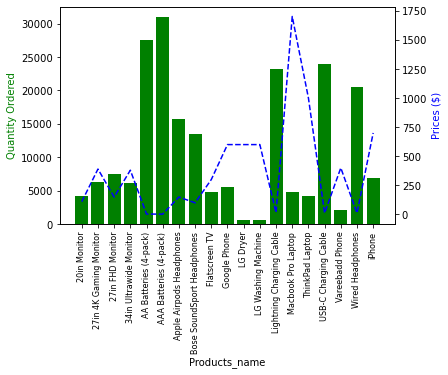

In [99]:
prices = all_sales.groupby("Product").mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(soldMost['Product'],soldMost['Quantity Ordered'], color = 'g')
ax1.set_xticklabels(soldMost['Product'],rotation = 'vertical',size = 8)
ax2.plot(soldMost['Product'],prices,'b--')
ax1.set_xlabel('Products_name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices ($)', color = 'b')
plt.show()